In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Analisis de la Keyword de los tweets

Antes que nada vemos la cantidad de elementos nulos que contiene la columna

In [4]:
keywords=tweets['keyword']
keywords.isnull().sum()

61

In [5]:
keywords_nulas=tweets.loc[(tweets['keyword'].isnull()),:]
keywords_nulas['target'].mean()

0.6885245901639344

Armo un dataframe auxiliar en el que no haya elementos nulos en la columna keyword

In [6]:
tweets_without_na=tweets.copy()
tweets_without_na.dropna(inplace=True,subset=['keyword']) 

In [7]:
keywords.value_counts()

fatalities               45
armageddon               42
deluge                   42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
keywords.value_counts().mean()

34.171945701357465

Text(0.5, 1.0, 'Distribucion de keywords por tweets')

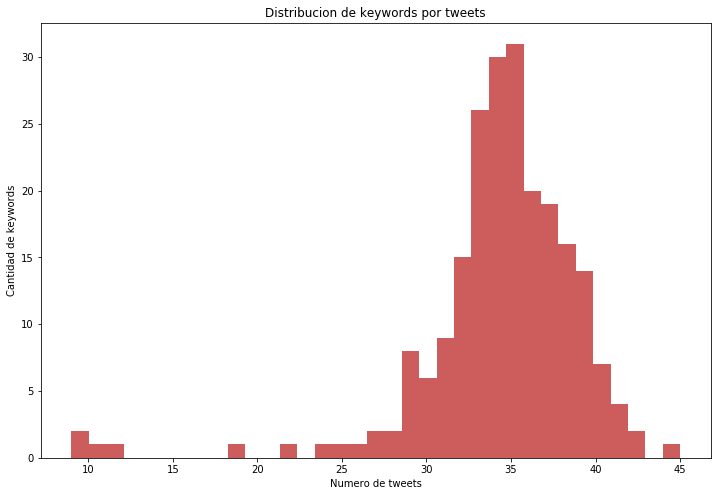

In [9]:
keyword_grouped=tweets.groupby(['keyword']).agg({'target':['mean','count']})
keyword_grouped[('target','count')].plot(kind='hist', bins=35,figsize=(12,8),color='indianred')
plt.xlabel('Numero de tweets')
plt.ylabel('Cantidad de keywords')
plt.title('Distribucion de keywords por tweets')

Analisis de la distribucion de la longitud de las keywords

Text(0.5, 1.0, 'Distribucion de la longitud de las keywords')

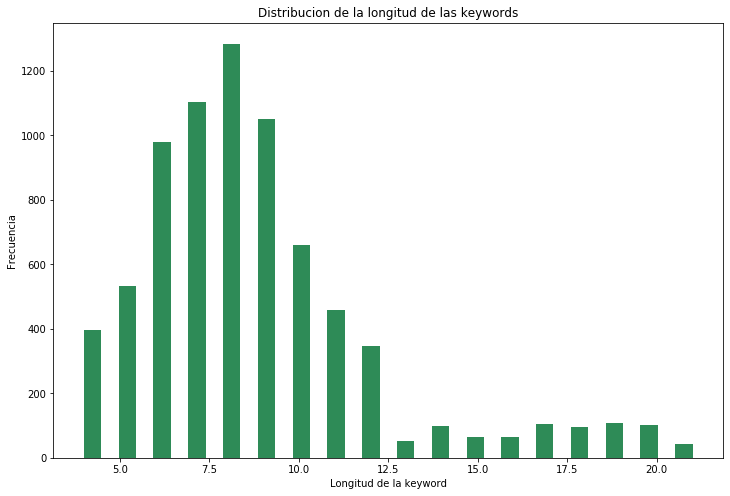

In [10]:
keywords_largo=tweets.copy()
keywords_largo['length']=keywords_largo['keyword'].str.len()
keywords_largo['length'].plot(kind='hist', bins=35,figsize=(12,8),color='seagreen')
plt.xlabel('Longitud de la keyword')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la longitud de las keywords')

In [11]:
keywords_largo['length'].mean()

8.737155720338983

¿Hay alguna relacion entre el largo de la keyword y la veracidad? Para analizarlo se separo en grupos el dataframe por longitud de la keyword, posteriormente se calculo la media de las longitudes. Y por ultimo se hizo un scatter plot para ver si hay relacion alguna

In [12]:
keywords_largo_verdaderas=keywords_largo.loc[(keywords_largo['target']==1),:]
keywords_largo_falsas=keywords_largo.loc[(keywords_largo['target']==0),:]

groups_by_length_false=keywords_largo_falsas.groupby(['length']).agg({'target':'count'}) 
groups_by_length_true=keywords_largo_verdaderas.groupby(['length']).agg({'target':'count'}) 

groups_by_length_false.reset_index(inplace=True)
groups_by_length_true.reset_index(inplace=True)

groups_by_length_false.set_index('length', inplace=True)
groups_by_length_true.set_index('length', inplace=True)

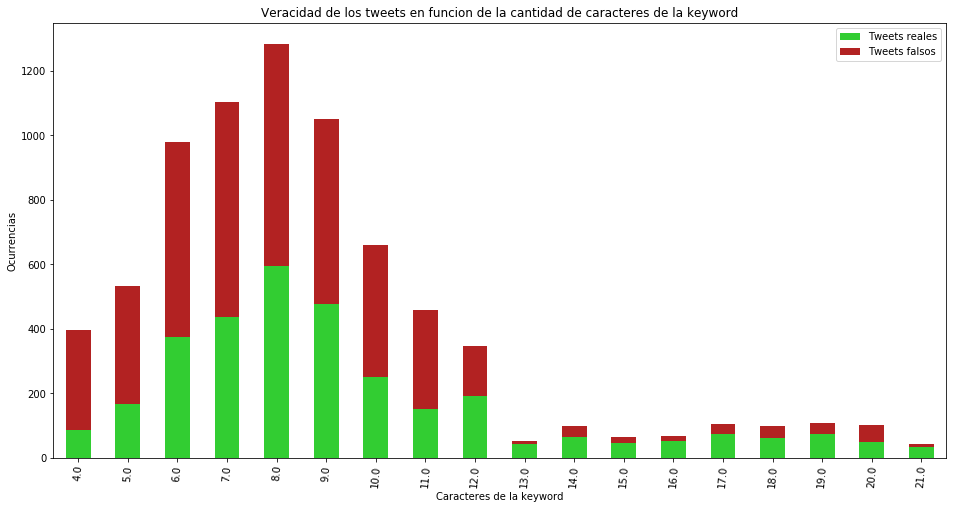

In [13]:
groups_by_length_true['target'].plot(kind='bar',figsize=(16,8),rot=85,title=\
        'Veracidad de los tweets en funcion de la cantidad de caracteres de la keyword',color='limegreen');
groups_by_length_false['target'].plot(kind='bar',figsize=(16,8),\
        bottom=groups_by_length_true['target'],rot=85,color='firebrick');
ax=plt.gca()
ax.set_ylabel('Ocurrencias')
ax.set_xlabel('Caracteres de la keyword');
ax.legend(labels=['Tweets reales', 'Tweets falsos'])

Calculamos la media de veracidad de la longitud mas frecuente

In [14]:
groups_by_length=keywords_largo.groupby(['length']).agg({'target':'mean'}) 
groups_by_length.iloc[4,0]

0.46303501945525294

Buscamos las keywords con mayor y menor proporcion de veracidad

In [15]:
keyword_grouped[('target','mean')].nsmallest(10)

keyword
aftershock     0.000000
body%20bags    0.024390
ruin           0.027027
blazing        0.029412
body%20bag     0.030303
electrocute    0.031250
screaming      0.055556
traumatised    0.057143
blew%20up      0.060606
panicking      0.060606
Name: (target, mean), dtype: float64

In [16]:
keyword_grouped[('target','mean')].nlargest(10)

keyword
debris               1.000000
derailment           1.000000
wreckage             1.000000
outbreak             0.975000
oil%20spill          0.973684
typhoon              0.973684
suicide%20bombing    0.969697
suicide%20bomber     0.967742
bombing              0.931034
rescuers             0.914286
Name: (target, mean), dtype: float64

Analizamos los textos relacionados a la keyword 'aftershock'

In [17]:
tweets_without_na[tweets_without_na['keyword'].str.contains("aftershock")]

,id,keyword,location,text,target
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
103,149,aftershock,304,'The man who can drive himself further once th...,0
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...,0
105,153,aftershock,304,'There is no victory at bargain basement price...,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles...,0
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that...,0
109,159,aftershock,304,'The harder the conflict the more glorious the...,0
110,160,aftershock,NaN,#GrowingUpSpoiled going clay pigeon shooting a...,0
111,161,aftershock,Somewhere Only We Know ?,So i guess no one actually wants any free Afte...,0


Calculamos la media de los tweets con keyword 'quarantine'

In [18]:
tweets_without_na[tweets_without_na['keyword'].str.contains("quarantine")].mean()

id        7846.281690
target       0.267606
dtype: float64

# Ubicacion de un tweet

La idea es analizar para ver si podemos encontrar alguna relacion entre la veracidad de los tweets y la ubicacion de los mismos. Primero revisamos como es el estilo de los datos y cuales son los mas frecuentes.

In [19]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Armo un plot con el top 50 mas frecuentes ubicaciones para visualizar mejor la distribucion de ellas.

Text(0.5, 1.0, 'Frecuencias de cada ubicacion')

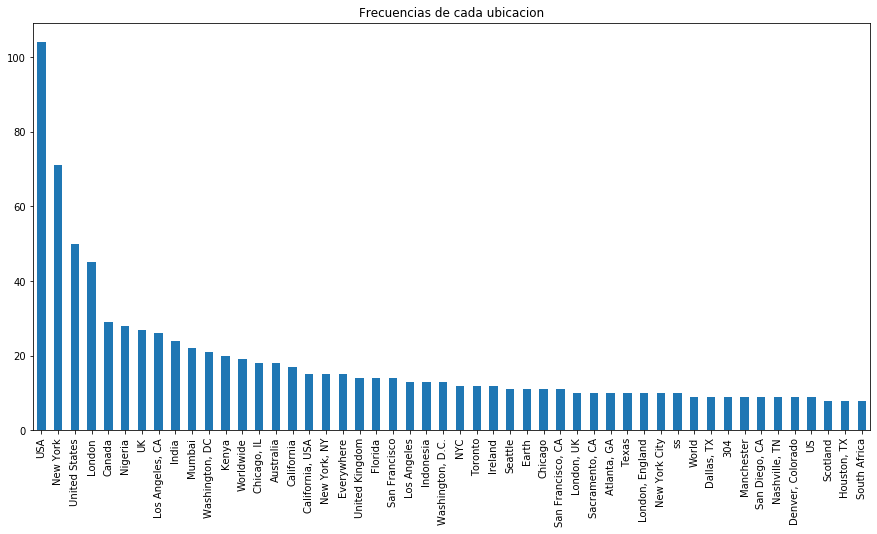

In [20]:
location_counts = tweets['location'].value_counts(dropna=True)
chart = location_counts.head(50).plot.bar(x='Ubicacion', y='Frecuencia', figsize=(15,7.5))
chart.set_title('Frecuencias de cada ubicacion')

¿Estara relacionada la veracidad de los tweets y la frecuencia de la ubicacion? Vamos a analizarlo agregando 2 columnas nuevas al dataframe. Estas nos van a mostrar la cantidad de tweets verdaderos y de tweets falsos que contiene cada lugar de ubicacion. 

In [21]:
location_df = pd.DataFrame([location_counts]).transpose()
location_df.columns = ['frequency']
location_df.loc[:, 'real_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
location_df.loc[:, 'fake_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())

Tomamos estas columnas nuevas y graficamos los datos para las 50 primeras.

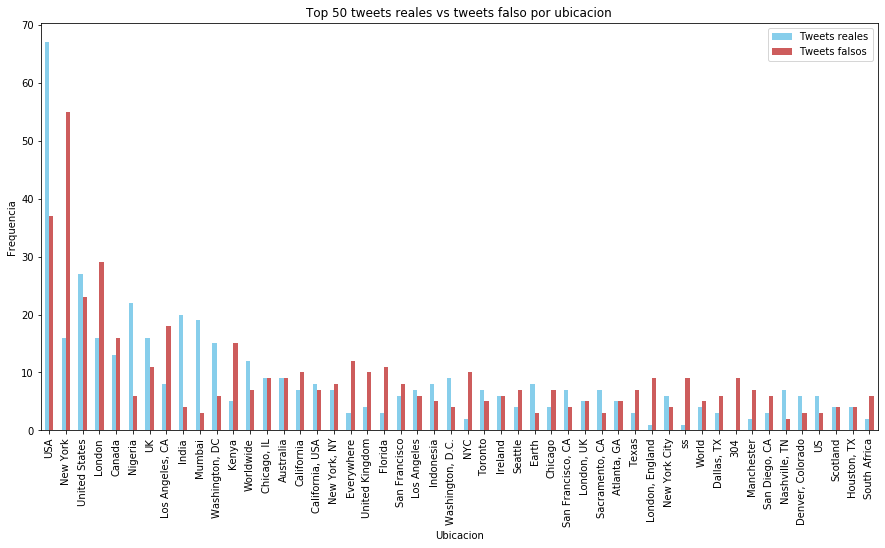

In [22]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

Como puede verse a primera vista no creo que podamos marcar ningun tipo de relacion entre las ubicaciones mas comunes y la veracidad de los tweets. Aun asi pareceria que las ubicacones con paises tienen un mayor porcentaje de tweets verdaderos. Separo las ubicaciones por paises.

In [23]:
countries = {
    'USA',
    'United States',
    'UK',
    'Canada',
    'Indonesia',
    'Kenya',
    'Nigeria',
    'US',
    'Scotland',
    'Ireland',
    'Australia',
    'United Kingdom',
    'South Africa'
}
countries_available = [x for x in location_counts.index.tolist() if x in countries]
country_df = pd.DataFrame()
for c in countries_available:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Tweets reales'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
country_df.loc[:, 'Tweets falsos'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())


Tomamos estos datos por pais y graficamos

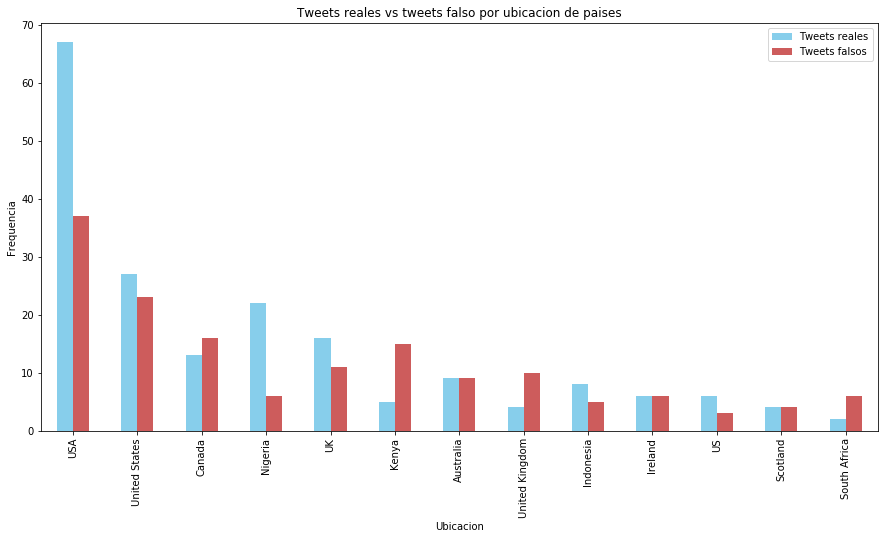

In [24]:
ax = country_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Tweets reales vs tweets falso por ubicacion de paises")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

En conclusion si bien pareceria que hay un mayor % de veracidad cuando la ubicacion se trata de un pais, no hay ninguna trend muy notable a la que podamos señalar.

### Ubicaciones invalidas

Ahora si, ¿Que ocurre con las ubicaciones que no representan ninguna ciudad? Voy a filtrar por ubicaciones que contengan caracteres invalidos como \#, ?, numeros y analizo la veracidad de esos tweets. 

In [25]:
invalid_characters_regex = '#|\$|\|%|\?|!|/|;|@|\+|\*|\d'
tweets_with_invalid_locs = tweets[tweets.location.notna() & tweets.location.str.match(invalid_characters_regex)]
tweets_with_invalid_locs

,id,keyword,location,text,target
103,149,aftershock,304,'The man who can drive himself further once th...,0
105,153,aftershock,304,'There is no victory at bargain basement price...,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles...,0
109,159,aftershock,304,'The harder the conflict the more glorious the...,0
125,180,aftershock,304,Sometimes you face difficulties not because yo...,0
...,...,...,...,...,...
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /frig...,1
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional trai...,0
7499,10727,wreck,709?,I still need to finish the lover but I'm watch...,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


In [26]:
fake_and_real_tweets_with_invalid = tweets_with_invalid_locs.groupby('target').agg({'target': lambda x: x.size})

Casi el 70% de los tweets que tienen uno de estos caracteres en la ubicacion es falso. Los porcentajes los podemos visualizar mejor con un pie chart.

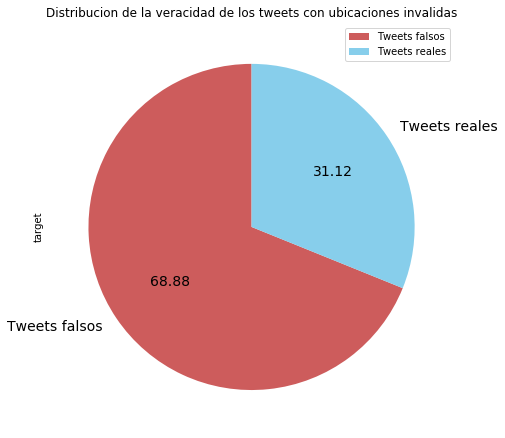

In [27]:
ax = fake_and_real_tweets_with_invalid.plot.pie(fontsize=14,colors=['IndianRed', 'SkyBlue'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f', startangle=90, figsize=(15,7.5), y='target', title="Distribucion de la veracidad de los tweets con ubicaciones invalidas")
plt.show()

### Longitud de la ubicacion y la veracidad

Quiero analizar si hay alguna relacion entre la cantidad de caracteres que tienen las ubicaciones y la veracidad de los tweets. Para esto creo una columna nueva que guarde el length de la ubicacion. Las ubicaciones NaN las tomamos como 0.

In [28]:
tweets_location_length = tweets.copy()
tweets_location_length['location_length'] = [(0 if isinstance(t, float) else len(t)) for t in tweets_location_length['location']]
tweets_location_length

,id,keyword,location,text,target,location_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0


¿Como es la distribucion de las longitudes de la ubicacion?

In [29]:
location_plot = tweets_location_length.where(lambda x: x['location_length'] > 0).dropna()

Remuevo las columnas que no tienen ubicacion y grafico

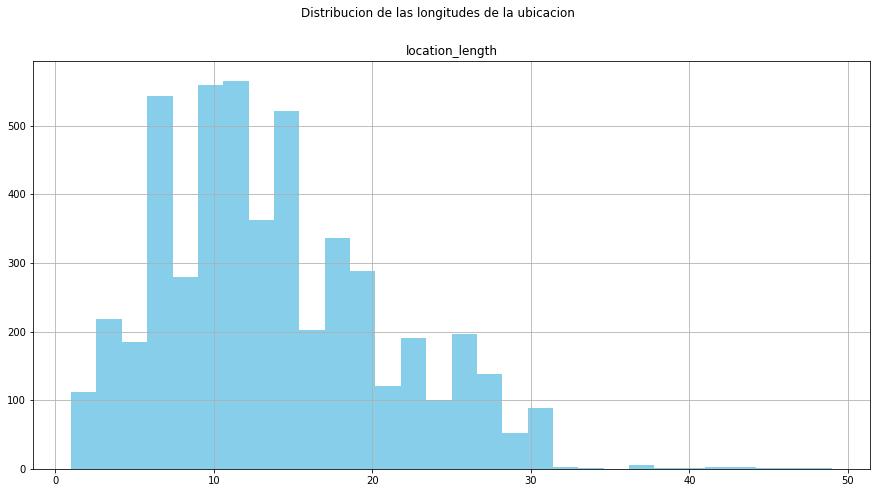

In [30]:
axes = location_plot.hist(column='location_length', figsize=(15,7.5), bins = 30, color = "skyblue")
plt.suptitle('Distribucion de las longitudes de la ubicacion')
plt.show()

Podemos ver que la longitudes rondan por su mayoria en el interval [5, 20]

Ahora analizamos las longitudes dividiendolas por categoria, reales o no (target 1 o 0)

In [31]:
location_plot.groupby('target').agg({'location_length': ['max', 'min', 'mean']})

location_length                
                   max  min       mean
target                                
0.0               47.0  1.0  13.636616
1.0               49.0  1.0  13.657559

A simple vista pareceria que la longitud de las ubicaciones de los tweets reales y los falsos tienden a ser muy similares y que no se puede asumir ninguna relacion entre ellos.

Armo un grafico para visualizar la relacion de las longitudes.

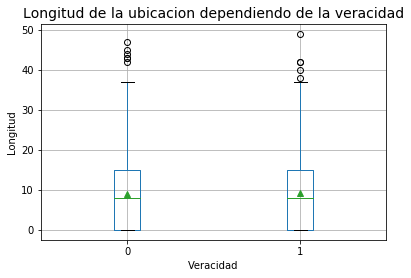

In [32]:
bp = tweets_location_length.boxplot(column='location_length', by='target', showmeans=True)
plt.suptitle("")
bp.set_title('Longitud de la ubicacion dependiendo de la veracidad', fontsize=14)
bp.set_ylabel('Longitud')
bp.set_xlabel('Veracidad')
plt.show()

### Nulalidad de la ubicacion

Viendo el estilo del los datos al inicio podemos observar que la mayoria de las ubicaciones no nulas se encuentran en america del norte o ciudades relacionadas. Pero ¿Cuantos de estas son nulas?. Añado una columna nueva al dataframe para guardar informacion sobre si la ubicacion es nula o no.

In [33]:
loc_tweets = tweets[['location', 'text', 'target']].copy()
loc_tweets.loc[:, 'has_location'] = loc_tweets['location'].notna()
loc_tweets.head()

,location,text,target,has_location
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,NaN,All residents asked to 'shelter in place' are ...,1,False
3,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


Y ahora dividimos el analisis en 2 partes

#### Tweets sin ubicacion

Ahora si, ¿Cuantos tweets sin ubicacion tenemos?

In [34]:
tweets_without_loc = loc_tweets[loc_tweets['has_location'] == False].copy()
len(tweets_without_loc)

2533

¿Como es la distribucion de los tweets sin ubicacion? Armo una tabla y Grafico

In [35]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_without_loc[['target', 'location']].groupby('target').agg(lambda x: x.size)

,location
target,
0,1458
1,1075


De los tweets sin ubicacion pareceria que la mayoria se compone de tweets falsos

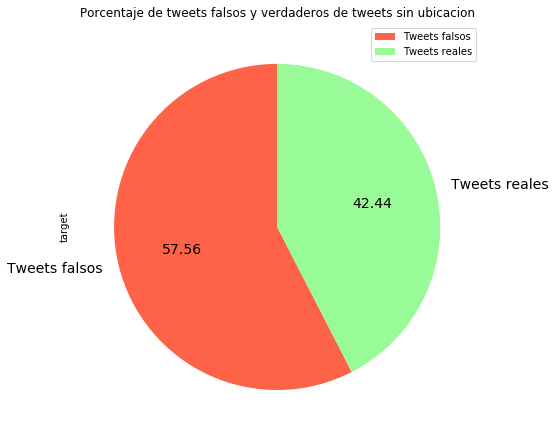

In [36]:
loc_plot = tweets_without_loc.groupby('target').agg({'target':lambda x: x.size})
ax = loc_plot.plot.pie(fontsize=14,colors=['tomato', 'palegreen'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f', startangle=90, figsize=(15,7.5), y='target', title="Porcentaje de tweets falsos y verdaderos de tweets sin ubicacion")
plt.show()

#### Tweets con ubicacion

¿Cuantos tweets con ubicacion tenemos?

In [37]:
tweets_with_loc = loc_tweets[loc_tweets['has_location'] == True].copy()
len(tweets_with_loc)

5080

¿Tendremos algun tipo de relacion entre la ubicacion y el texto? Creo una nueva columna `location_in_text` que represente si la ubicacion esta mencionada en el texto.

In [38]:
in_text = tweets_with_loc.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_with_loc.loc[:, 'location_in_text'] = in_text
tweets_with_loc.head()

,location,text,target,has_location,location_in_text
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True,False
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True,False
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,False
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True,False


In [39]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_with_loc[['target', 'location_in_text']].groupby('location_in_text').agg({'target': [fake_tweets, real_tweets]})

target            
                 fake_tweets real_tweets
location_in_text                        
False                   2864        2156
True                      20          40

A partir de esta informacion no podemos concluir mucho ya que muy pocos tweets mencionan la ubicacion en el tweet. Aun asi podemos ver que de los que mencionan la ubicacion en el tweet el 66% son reales.